In this project I use data from FRED (Federal Reserve Bank of St. Louis) on 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity (T10Y2Y). The T10Y2Y is a financial indicator that measures the difference between the yields of 10-year and 2-year U.S. Treasury securities (aka the "yield spread" or the "term spread") in basis points.  Positive spread means that 10-year bonds have higher yields than 2-year bonds, which is the normal situation. Negative speard (aka yield curve inversion) is a sign of potential economic slowdown or recession.

Economists and investors use this as an indicator of market expectations about future economic conditions and monetary policy. 

FRED provides this data by API. You can request an API key for free. 

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from darts import TimeSeries
from darts.models import ExponentialSmoothing

# FRED API request 
api_key = YOUR_KEY
params = {
    'series_id': 'T10Y2Y',
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': '2000-01-01',
    'observation_end': datetime.now().strftime('%Y-%m-%d'),
}
url = "https://api.stlouisfed.org/fred/series/observations"
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    observations = data['observations']
    df = pd.DataFrame(observations)
    df['date'] = pd.to_datetime(df['date'])
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    df = df.sort_values('date')
    
    # Create a Darts TimeSeries
    series = TimeSeries.from_dataframe(df, 'date', 'value')
    
    # Fit the model and predict the next 10 steps
    model = ExponentialSmoothing()
    model.fit(series)
    forecast = model.predict(10)
    
    # Plot the results using matplotlib
    plt.figure(figsize=(12, 6))
    series.plot(label="Actual", color='blue')
    forecast.plot(label="Forecast", color='red')
    
    plt.title("10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity")
    plt.xlabel("Date")
    plt.ylabel("Spread")
    plt.legend()
    plt.grid(True)
    plt.savefig("ExponentialSmoothing.png")
    plt.tight_layout()
    plt.show()
    
else:
    print(f"Error: {response.status_code}")
    print(response.text)


# Darts for Time Series Analysis in Python

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

import matplotlib.pyplot as plt
import pandas as pd

from darts.dataprocessing import Pipeline
from darts.dataprocessing.transformers import (
    InvertibleMapper,
    Mapper,
    MissingValuesFiller,
    Scaler,
)
from darts.metrics import mape
from darts.models import ExponentialSmoothing
from darts.utils.timeseries_generation import linear_timeseries



In [ ]:
import matplotlib.pyplot as plt
from darts.models import ExponentialSmoothing

# Fit the model and predict the next 10 steps
model = ExponentialSmoothing()
model.fit(series)
forecast = model.predict(10)

# Plot the results using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(series.time_index, series.values(), label="Actual", color='blue')
plt.plot(forecast.time_index, forecast.values(), label="Forecast", color='red')

plt.title("Exponential Smoothing Forecast")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.savefig("ExponentialSmoothing.png")
plt.tight_layout()
plt.show()

In [ ]:
"""
Stuck forecast
"""

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from darts import TimeSeries
from darts.models import ARIMA

# FRED API request (as before)
api_key = YOUR_KEY
params = {
    'series_id': 'T10Y2Y',
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': '2000-01-01',
    'observation_end': datetime.now().strftime('%Y-%m-%d'),
}
url = "https://api.stlouisfed.org/fred/series/observations"
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    observations = data['observations']
    df = pd.DataFrame(observations)
    df['date'] = pd.to_datetime(df['date'])
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    
    # Handle missing values by forward filling
    df['value'] = df['value'].ffill()
    
    df = df.sort_values('date')
    
    # Create a Darts TimeSeries
    series = TimeSeries.from_dataframe(df, 'date', 'value')
    
    # Fit the ARIMA model and predict the next 10 steps
    model = ARIMA(p=1, d=1, q=1)  # You can adjust these parameters
    model.fit(series)
    forecast = model.predict(1000)
    
    # Plot the results using matplotlib
    plt.figure(figsize=(12, 6))
    series.plot(label="Actual", color='blue')
    forecast.plot(label="Forecast", color='red')
    
    plt.title("10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity")
    plt.xlabel("Date")
    plt.ylabel("Spread")
    plt.legend()
    plt.grid(True)
    plt.savefig("ARIMA_Forecast.png")
    plt.tight_layout()
    plt.show()
    
else:
    print(f"Error: {response.status_code}")
    print(response.text)


In [ ]:
import requests
import pandas as pd
from datetime import datetime
from darts import TimeSeries

api_key = YOUR_KEY
params = {
    'series_id': 'T10Y2Y',
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': '2000-01-01',
    'observation_end': datetime.now().strftime('%Y-%m-%d'),
}
url = "https://api.stlouisfed.org/fred/series/observations"
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    observations = data['observations']
    df = pd.DataFrame(observations)
    df['date'] = pd.to_datetime(df['date'])
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    
    # Handle missing values by forward filling
    df['value'] = df['value'].ffill()
    
    df = df.sort_values('date')
    
    # Create a Darts TimeSeries
    series = TimeSeries.from_dataframe(df, 'date', 'value')
    
else:
    print(f"Error: {response.status_code}")
    print(response.text)

/Users/jnesnky/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/jnesnky/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/jnesnky/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/jnesnky/opt/anaconda3/lib/python3.8/site-packages/t

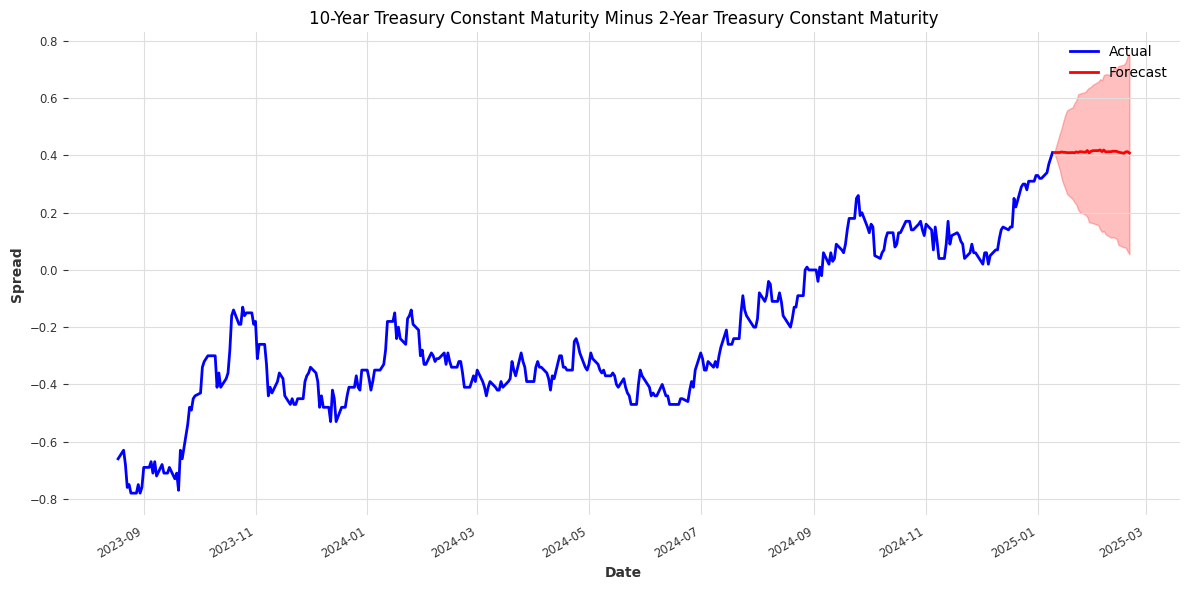

In [4]:
"""
ARIMA
"""

import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import ARIMA

    
# Fit the ARIMA model and predict the next 30 steps with 1000 samples
model = ARIMA(p=1, d=1, q=1)  # Adjust these parameters as needed
model.fit(series)
forecast = model.predict(n=30, num_samples=1000)
    
# Plot the results with uncertainty 
plt.figure(figsize=(12, 6))
series[-365:].plot(label="Actual", color='blue')
forecast.plot(label="Forecast", color='red')
    
plt.title("10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("ARIMA_Forecast.png")
plt.show()

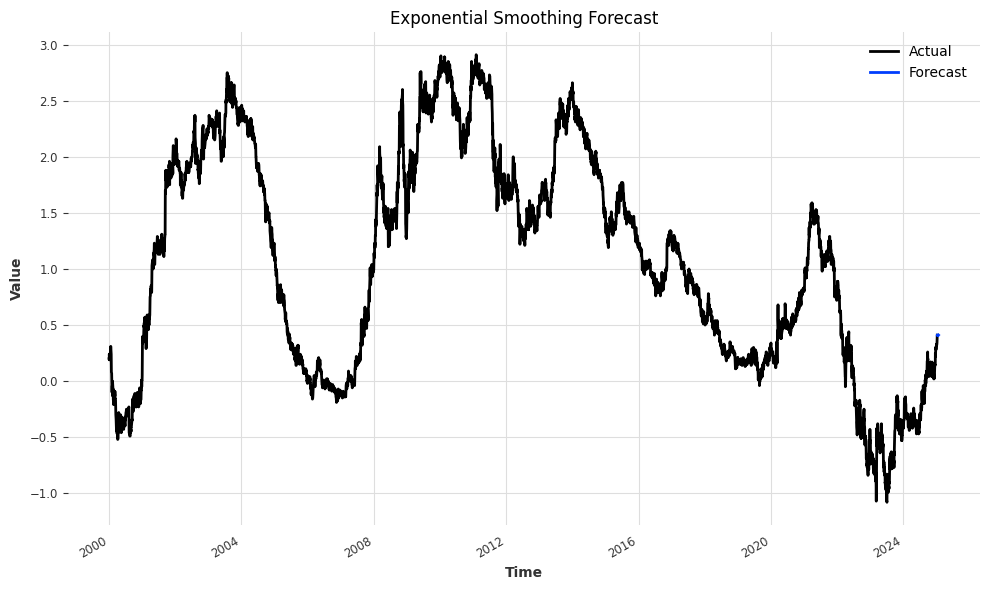

In [5]:
from darts.models import ExponentialSmoothing

# Fit the model and predict the next 365 steps
model = ExponentialSmoothing()
model.fit(series)
forecast = model.predict(365)

# Plot the results using matplotlib
plt.figure(figsize=(10, 6))
series.plot(label="Actual")
forecast.plot(label="Forecast")

plt.title("Exponential Smoothing Forecast")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.savefig("ExponentialSmoothing.png")
plt.tight_layout()
plt.show()


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from darts import TimeSeries
from darts.models import ARIMA

def fetch_fred_data(series_id, api_key, start_date='2000-01-01'):
    """Fetch data from FRED API."""
    params = {
        'series_id': series_id,
        'api_key': api_key,
        'file_type': 'json',
        'observation_start': start_date,
        'observation_end': datetime.now().strftime('%Y-%m-%d'),
    }
    url = "https://api.stlouisfed.org/fred/series/observations"
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        observations = data['observations']
        df = pd.DataFrame(observations)
        df['date'] = pd.to_datetime(df['date'])
        df['value'] = pd.to_numeric(df['value'], errors='coerce')
        df['value'] = df['value'].ffill()  # Handle missing values
        df = df.sort_values('date')
        return TimeSeries.from_dataframe(df, 'date', 'value')
    else:
        raise Exception(f"API request failed with status code {response.status_code}")

def build_and_forecast(series, forecast_horizon=30, num_samples=1000):
    """Build ARIMA model and generate forecast."""
    model = ARIMA(p=1, d=1, q=1)  # You can adjust these parameters
    model.fit(series)
    forecast = model.predict(n=forecast_horizon, num_samples=num_samples)
    return forecast

def visualize_forecast(series, forecast, title, filename):
    """Visualize the original series and forecast."""
    plt.figure(figsize=(12, 6))
    series[-365:].plot(label="Actual", color='blue')  # Plot last year of actual data
    forecast.plot(label="Forecast", color='red')
    
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Spread")
    plt.legend()
    plt.grid(True)
    plt.savefig(filename)
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    api_key = "8f058d10ec8c788296c040ea09e634d5"
    series_id = "T10Y2Y"
    
    try:
        # Step 1: Fetch data
        series = fetch_fred_data(series_id, api_key)
        print("Data fetched successfully.")
        
        # Step 2: Build model and forecast
        forecast = build_and_forecast(series)
        print("Forecast generated successfully.")
        
        # Step 3: Visualize results
        visualize_forecast(series, forecast, 
                           "10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity",
                           "ARIMA_Forecast.png")
        print("Visualization completed and saved.")
        
        print("\nForecast for the next 30 periods:")
        print(forecast)
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")


In [ ]:
import warnings
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from darts import TimeSeries
from darts.dataprocessing.transformers import MissingValuesFiller, Scaler
from darts.metrics import r2_score
from darts.models import NBEATSModel
from darts.utils.callbacks import TFMProgressBar

warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

import requests
import pandas as pd
from datetime import datetime

def fetch_fred_data(series_id, api_key, start_date='2000-01-01', save_csv=False):
    """
    Fetch data from FRED API, process it, and optionally save to CSV.
    
    Args:
    series_id (str): The FRED series ID.
    api_key (str): Your FRED API key.
    start_date (str): The start date for data retrieval (default: '2000-01-01').
    save_csv (bool): Whether to save the data to a CSV file (default: False).
    
    Returns:
    pandas.DataFrame: Processed data from FRED API.
    """
    params = {
        'series_id': series_id,
        'api_key': api_key,
        'file_type': 'json',
        'observation_start': start_date,
        'observation_end': datetime.now().strftime('%Y-%m-%d'),
    }
    url = "https://api.stlouisfed.org/fred/series/observations"
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        observations = data['observations']
        df = pd.DataFrame(observations)
        df['date'] = pd.to_datetime(df['date'])
        df['value'] = pd.to_numeric(df['value'], errors='coerce')
        
        # Drop rows with NaN values
        df = df.dropna()
        
        df = df.sort_values('date')
        df = df.set_index('date')
        
        if save_csv:
            csv_filename = f"{series_id}_data.csv"
            df.to_csv(csv_filename)
            print(f"Data saved to {csv_filename}")
        
        return df
    else:
        raise Exception(f"API request failed with status code {response.status_code}")

def generate_torch_kwargs():
    return {
        "pl_trainer_kwargs": {
            "accelerator": "cpu",
            "callbacks": [TFMProgressBar(enable_train_bar_only=True)],
        }
    }

def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(12, 6))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.plot(label="Actual")
    pred_series.plot(label=f"{forecast_type.capitalize()} Forecast")
    plt.title(f"10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity\nR2: {r2_score(ts_transformed, pred_series):.4f}")
    plt.xlabel("Date")
    plt.ylabel("Spread")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"NBEATS_{forecast_type}_Forecast.png")
    plt.show()

if __name__ == "__main__":
    api_key = "8f058d10ec8c788296c040ea09e634d5"
    series_id = "T10Y2Y"

    # Fetch data from FRED
    df = fetch_fred_data(series_id, api_key)
    print("Data fetched successfully.")

    # Create TimeSeries
    series = TimeSeries.from_dataframe(df, 'date', 'value')

    # Handle missing values and scale the data
    filler = MissingValuesFiller()
    scaler = Scaler()
    series_filled = filler.transform(series)
    series_scaled = scaler.fit_transform(series_filled)

    # Split the data
    train, val = series_scaled.split_before(pd.Timestamp("2020-01-01"))

    # Create and train the model
    model = NBEATSModel(
        input_chunk_length=30,
        output_chunk_length=7,
        n_epochs=100,
        random_state=42,
        **generate_torch_kwargs()
    )
    model.fit(train, val_series=val)

    # Make predictions
    historic_predictions = model.historical_forecasts(
        series_scaled,
        start=pd.Timestamp("2020-01-01"),
        forecast_horizon=7,
        stride=1,
        retrain=False,
        verbose=True,
    )

    future_predictions = model.predict(n=30)

    # Inverse transform the predictions and actual data
    historic_predictions = scaler.inverse_transform(historic_predictions)
    future_predictions = scaler.inverse_transform(future_predictions)
    series_original = scaler.inverse_transform(series_scaled)

    # Display forecasts
    display_forecast(historic_predictions, series_original, "historical", start_date=pd.Timestamp("2020-01-01"))
    display_forecast(future_predictions, series_original, "future")

    print("Forecasting completed and visualizations saved.")


In [ ]:
"""
works
"""

import warnings
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from darts import TimeSeries
from darts.dataprocessing.transformers import MissingValuesFiller, Scaler
from darts.metrics import mae, r2_score
from darts.models import NBEATSModel, FFT
from darts.utils.callbacks import TFMProgressBar

warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

import requests
import pandas as pd
from datetime import datetime

def fetch_fred_data(series_id, api_key, start_date='2000-01-01', save_csv=False):
    """
    Fetch data from FRED API, process it, and optionally save to CSV.
    
    Args:
    series_id (str): The FRED series ID.
    api_key (str): Your FRED API key.
    start_date (str): The start date for data retrieval (default: '2000-01-01').
    save_csv (bool): Whether to save the data to a CSV file (default: False).
    
    Returns:
    pandas.DataFrame: Processed data from FRED API.
    """
    params = {
        'series_id': series_id,
        'api_key': api_key,
        'file_type': 'json',
        'observation_start': start_date,
        'observation_end': datetime.now().strftime('%Y-%m-%d'),
    }
    url = "https://api.stlouisfed.org/fred/series/observations"
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        observations = data['observations']
        df = pd.DataFrame(observations)
        df['date'] = pd.to_datetime(df['date'])
        df['value'] = pd.to_numeric(df['value'], errors='coerce')
        
        # Drop rows with NaN values
        df = df.dropna()
        df = df.sort_values('date')
        df = df.set_index('date')
        
        if save_csv:
            csv_filename = f"{series_id}_data.csv"
            df.to_csv(csv_filename)
            print(f"Data saved to {csv_filename}")
        
        return df
    else:
        raise Exception(f"API request failed with status code {response.status_code}")

def generate_torch_kwargs():
    return {
        "pl_trainer_kwargs": {
            "accelerator": "cpu",
            "callbacks": [TFMProgressBar(enable_train_bar_only=True)],
        }
    }

def plot_forecast(train, val, pred, title):
    plt.figure(figsize=(12, 6))
    train.plot(label="Train")
    val.plot(label="Validation")
    pred.plot(label="Prediction")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Spread")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{title.replace(' ', '_')}.png")
    plt.show()
    print(f"MAE: {mae(pred, val):.4f}")

if __name__ == "__main__":
    api_key = "8f058d10ec8c788296c040ea09e634d5"
    series_id = "T10Y2Y"

    # Fetch data from FRED
    df = fetch_fred_data(series_id, api_key)
    print("Data fetched successfully.")

    # Resample the data to daily frequency, forward filling missing values
    df = df.resample('D').ffill()

    # Create TimeSeries
    filler = MissingValuesFiller()
    scaler = Scaler()
    series = filler.transform(
        TimeSeries.from_dataframe(df, value_cols=["value"], freq='D')
    ).astype(np.float32)

    # Split the data
    train, val = series.split_after(pd.Timestamp("2020-01-01"))

    train_scaled = scaler.fit_transform(train)
    val_scaled = scaler.transform(val)
    series_scaled = scaler.transform(series)
    
    # NBEATS Model
    model_name = "nbeats_run"
    model_nbeats = NBEATSModel(
        input_chunk_length=30,
        output_chunk_length=7,
        generic_architecture=True,
        num_stacks=10,
        num_blocks=1,
        num_layers=4,
        layer_widths=512,
        n_epochs=100,
        nr_epochs_val_period=1,
        batch_size=800,
        random_state=42,
        model_name=model_name,
        save_checkpoints=True,
        force_reset=True,
        **generate_torch_kwargs(),
    )
    model_nbeats.fit(train_scaled, val_series=val_scaled)

    # Make predictions with NBEATS
    nbeats_pred = model_nbeats.predict(len(val_scaled))
    nbeats_pred = scaler.inverse_transform(nbeats_pred)
    plot_forecast(train, val, nbeats_pred, "NBEATS Forecast")

    # FFT Model examples
    # Example 1: Basic FFT
    model_fft = FFT(required_matches=set(), nr_freqs_to_keep=None)
    model_fft.fit(train)
    fft_pred = model_fft.predict(len(val))
    plot_forecast(train, val, fft_pred, "Basic FFT Forecast")

    # Example 2: FFT with all frequencies
    model_fft_all = FFT(nr_freqs_to_keep=None)
    model_fft_all.fit(train)
    fft_all_pred = model_fft_all.predict(len(val))
    plot_forecast(train, val, fft_all_pred, "FFT Forecast (All Frequencies)")

    # Example 3: FFT with limited frequencies
    model_fft_limited = FFT(nr_freqs_to_keep=20)
    model_fft_limited.fit(train)
    fft_limited_pred = model_fft_limited.predict(len(val))
    plot_forecast(train, val, fft_limited_pred, "FFT Forecast (Limited Frequencies)")

    # Example 4: FFT with polynomial trend
    model_fft_trend = FFT(trend="poly")
    model_fft_trend.fit(train)
    fft_trend_pred = model_fft_trend.predict(len(val))
    plot_forecast(train, val, fft_trend_pred, "FFT Forecast with Polynomial Trend")

    print("Forecasting completed and visualizations saved.")


/Users/jnesnky/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot: xlabel='Date'>

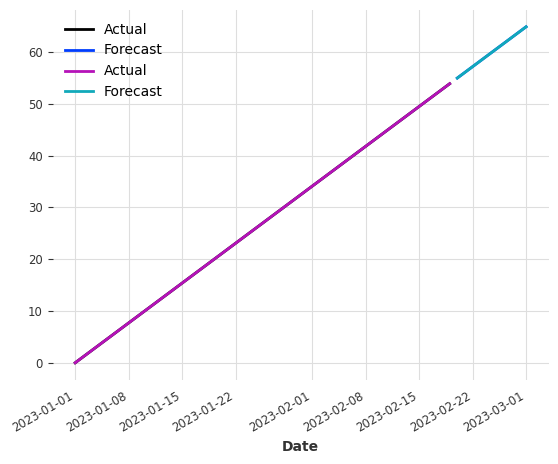

In [7]:
import pandas as pd
from darts import TimeSeries

# Create a Pandas DataFrame
date_range = pd.date_range(start="2023-01-01", periods=50, freq="D")
values = [i + (i * 0.1) for i in range(50)]
df = pd.DataFrame({"Date": date_range, "Value": values})

# Convert to TimeSeries object
series = TimeSeries.from_dataframe(df, time_col="Date", value_cols="Value")
series.head()
"""Simple Forecasting with Darts
Darts supports traditional methods like Exponential Smoothing and ARIMA for quick, interpretable forecasts.
Exponential Smoothing"""
from darts.models import ExponentialSmoothing

# Fit the model and predict the next 10 steps
model = ExponentialSmoothing()
model.fit(series)
forecast = model.predict(10)

# Plot the results
series.plot(label="Actual")
forecast.plot(label="Forecast")
"""ARIMA"""
from darts.models import ARIMA

# Fit the ARIMA model
model = ARIMA(1, 1, 1)
model.fit(series)
forecast = model.predict(10)

# Plot the results
series.plot(label="Actual")
forecast.plot(label="Forecast")


In [ ]:
"""The autoARIMA implementations in other tools like statsmodels are easier to use than Darts. 
Machine Learning Models in Darts
But that is just the start. Darts can also do more advanced forecasting with machine learning models like Random Forests and LightGBM.
LightGBM"""
from darts.models import LightGBMModel
# Split data into train and validation
train, val = series.split_before(0.8)
# Fit a LightGBM model
model = LightGBMModel(lags=12)
model.fit(train)
forecast = model.predict(len(val))
# Plot the results
series.plot(label="Actual")
forecast.plot(label="Forecast")
"""Deep Learning Models in Darts
Darts includes state-of-the-art deep learning models like LSTMs, N-BEATS, and transformers for handling complex patterns.
LSTM"""
from darts.models import RNNModel
# Fit an LSTM model
model = RNNModel(model="LSTM", input_chunk_length=12, output_chunk_length=6, n_epochs=50)
model.fit(train)
forecast = model.predict(len(val))
# Plot the results
series.plot(label="Actual")
forecast.plot(label="Forecast")

In [6]:
%matplotlib inline
training, validation = series.split_before(pd.Timestamp("2024-01-01"))

model = ExponentialSmoothing()
model.fit(training)
forecast = model.predict(360)

plt.title(f"MAPE = {mape(forecast, validation):.2f}%")
series.plot(label="actual")
forecast.plot(label="forecast")
plt.legend()

NameError: name 'mape' is not defined